# Python para Geociencias

### Víctor Rojas
#### vr.rojaspozo@gmail.com

Esto es parte de las notas de [**Python para Geociencias**](https://github.com/vrrp/Workshop2018Python)  

# Módulo 3
En este módulo, primero revisaremos algunos de los formatos de datos espaciales más comunes utilizados en las ciencias ambientales y cómo los clasificamos como formatos raster o vectorial.

Los datos ráster o "cuadriculados" se guardan en una cuadrícula (grilla) uniforme y se representan en un mapa como píxeles. Cada píxel contiene un valor que representa un área en la superficie de la Tierra.

Hay muchos formatos de  archivos de datos raster, en este módulo nos centraremos en los siguientes formatos:
* Archivo de datos en formato netCDF4
* Archivo de datos en formato grib2
* Archivo de datos en formato tiff

Los archivos de datos en formato **netCDF4, grib2** y **tiff** que se usarán para el desarrollo del presente módulo, se encuentran en la carperta **data**.

# 11. Procesamiento y visualización de datos en formato netCDF4

El archivo de datos en formato **netCDF**, es el formato de datos estándar para el intercambio de datos científicos. La página de inicio del proyecto **netCDF** esta alojada en el programa **Unidata** de la **Corporación Universitaria de Invetigación Atmosférica (UCAR)**. Como todos los formatos de datos autodescriptivos, el formato **netCDF** incluye una API estándar (interfaz de programa de aplicación) y bibliotecas portátiles de acceso de datos en una variedad de lenguajes de programción, incluyendo python.

Para desarrollar esta lección se hará uso de los paquetes de python **numpy, matplotlib, netCDF4 y shapefile**, los cuales ya se encuentran compilados en **Anaconda**. 

### Instalar paquetes adicionales de python usando Anaconda

### netCDF4:
> $ conda config --add channels conda-forge

> $ conda install netcdf4

### matplotlib y basemap
> $ conda install matplotlib basemap basemap-data-hires

Acontinuación se inicia con la lectura y exploración  de archivos de datos en formato netCDF usando el paquete **netCDF4** de python. En esta lección se emplean datos climatológicos ICOADS de temperatura superficial del mar **(sst.cdf)** y precipitación **(prc.cdf)**.

### Procesamiento de los datos sst.cdf

In [1]:
# importar los paquetes numpy, matplotlib y netCDF4
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset as nc

# Leer archivo de datos en formato netCDF4
ncfile    = nc("./data/sst.cdf")
print(ncfile)



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): X(720), Y(360), T(12)
    variables(dimensions): float32 X(X), float32 Y(Y), float32 T(T), float32 sst(T,Y,X)
    groups: 



In [2]:
data1 = ncfile.variables["sst"][:]
lon1  = ncfile.variables["X"][:]
lat1  = ncfile.variables["Y"][:]
print("dim(data1) = ", data1.shape)
print("dim(lon1) = ", lon1.shape)
print("dim(lat1) = ", lat1.shape)

dim(data1) =  (12, 360, 720)
dim(lon1) =  (720,)
dim(lat1) =  (360,)


>Para graficar los datos correspondiente a **sst** y **prc**, haremos uso del módulo **mypyplot**. Cabe resaltar que dicho módulo es la recopilación de código realizado durante los módulos 1 y 2; dicho módulo consta de los métodos **plot1p** y **plot2p**, los cuales presentan gráficas de 1 y 2 paneles de gráficos, respectivamente. Las siguientes tres líneas de código permiten importar el módulo **mypyplot**.

In [3]:
import sys
sys.path.append('./mylib') 
from mypyplot import plot1p

Tienes suerte, los graficos se crearon sin problemas...


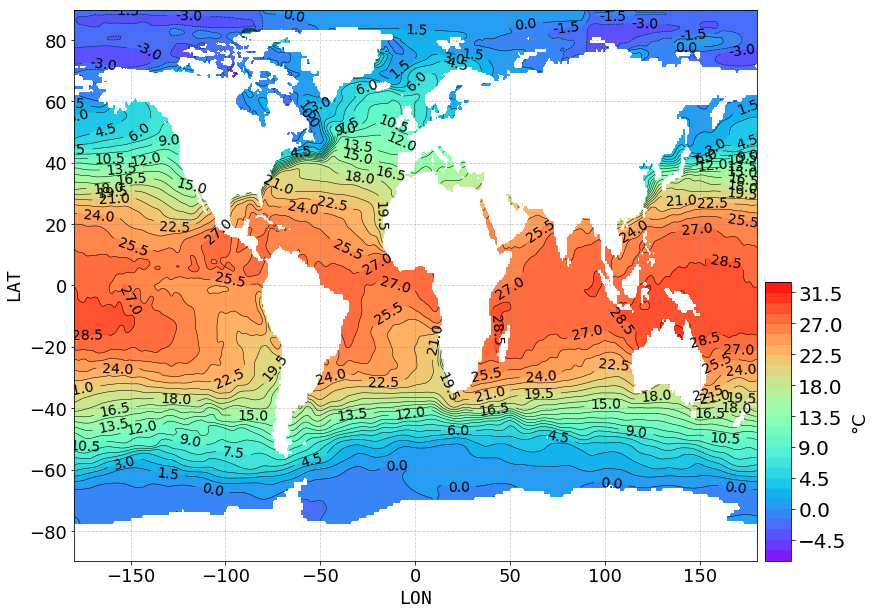

In [4]:
plot1p(data1[0,...], lat1, lon1, "°C", "./graficos/sst_coads")
plt.show()

Tienes suerte, los graficos se crearon sin problemas...


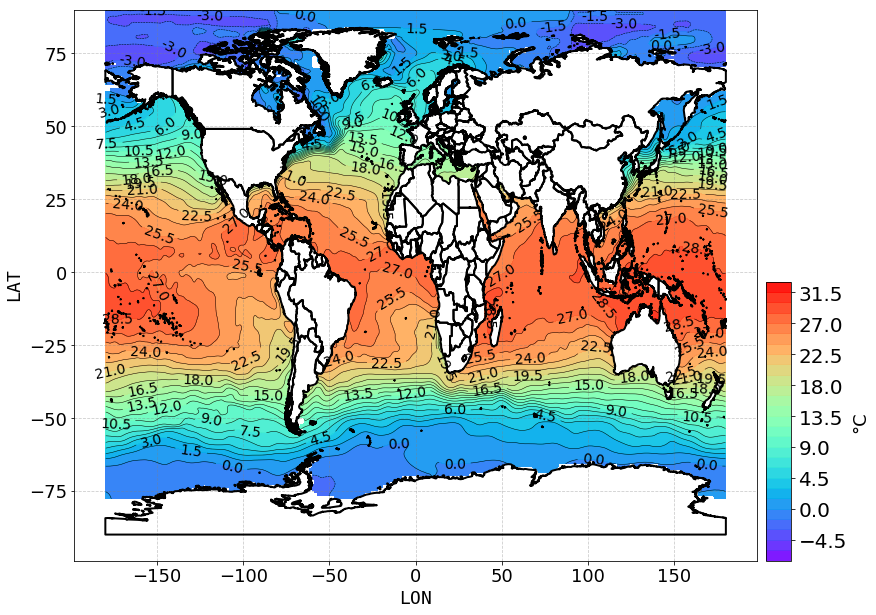

In [5]:
shp ='./data/shp/Countries_Shape/ne_10m_admin_0_countries.shp'
plot1p(data1[0,...], lat1, lon1, "°C", "./graficos/sst_coads", putshp=shp)
plt.show()

Tienes suerte, los graficos se crearon sin problemas...


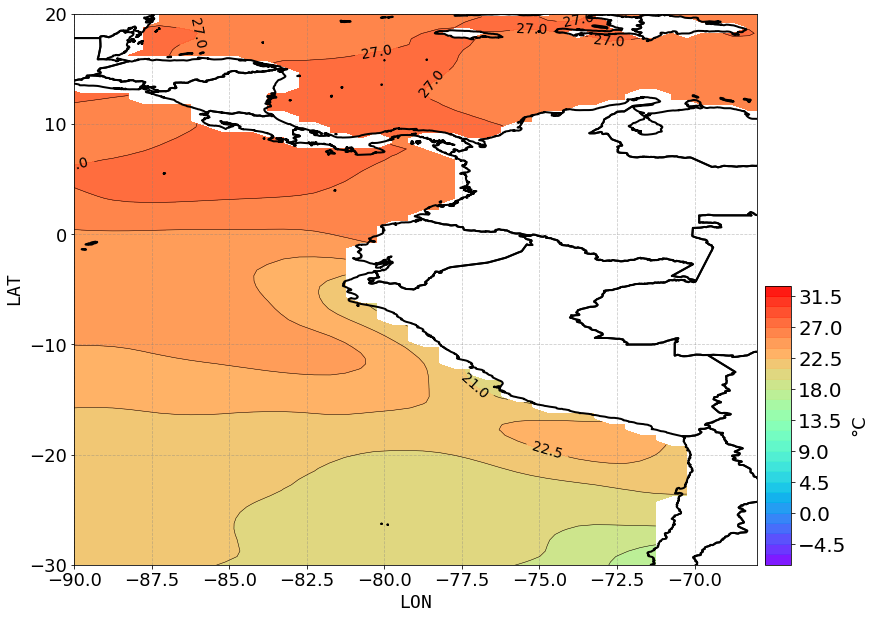

In [6]:
shp ='./data/shp/Countries_Shape/ne_10m_admin_0_countries.shp'
peru = [-30, 20, -90,-68]
plot1p(data1[0,...], lat1, lon1, "°C", "./graficos/sst_coads", putshp=shp, subR=peru)
plt.show()

Tienes suerte, los graficos se crearon sin problemas...


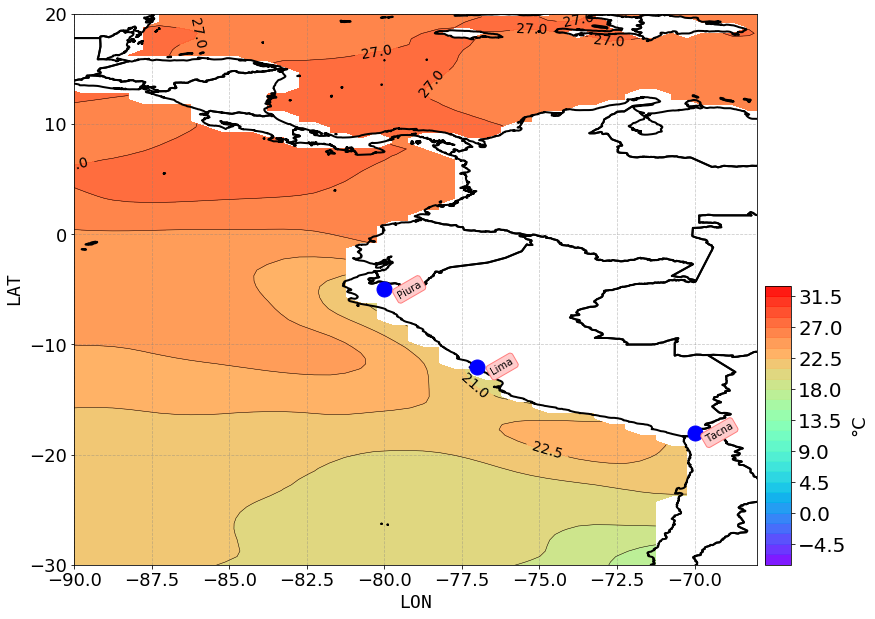

In [7]:
shp ='./data/shp/Countries_Shape/ne_10m_admin_0_countries.shp'
peru = [-30, 20, -90,-68]

clats = [-5, -12, -18]
clons = [-80, -77, -70]
cname = ["Piura", "Lima", "Tacna"]
ciudad = {"lats":clats, "lons":clons, "cname":cname}


from mypyplot import plot1p
plot1p(data1[0,...], lat1, lon1, "°C", "./graficos/sst_coads", putshp=shp, subR=peru, city=ciudad)
plt.show()


In [8]:
print(lon1.shape)
print(lat1.shape)

(720,)
(360,)


Tienes suerte, los graficos se crearon sin problemas...


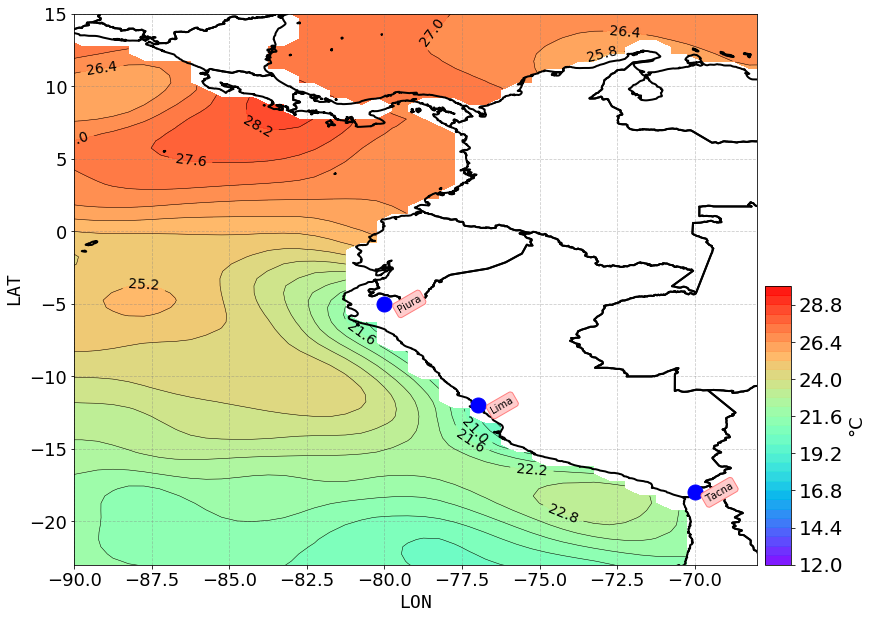

In [9]:
shp ='./data/shp/Countries_Shape/ne_10m_admin_0_countries.shp'
peru = [-23, 15, -90,-68]

clats = [-5, -12, -18]
clons = [-80, -77, -70]
cname = ["Piura", "Lima", "Tacna"]
ciudad = {"lats":clats, "lons":clons, "cname":cname}
import numpy.ma as ma
dataMask = ma.masked_outside(data1[0,...],12,30)
from mypyplot import plot1p
plot1p(dataMask, lat1, lon1, "°C", "./graficos/sst_coads", putshp=shp, subR=peru, city=ciudad)
plt.show()



### Procesamiento de los datos prc.cdf

In [10]:
# importar los paquetes numpy, matplotlib y netCDF4
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset as nc

# Leer archivo de datos en formato netCDF4
ncfile    = nc("./data/prc.cdf")
print(ncfile)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): X(720), Y(360), T(12)
    variables(dimensions): float32 X(X), float32 Y(Y), float32 T(T), float32 precip(T,Y,X)
    groups: 



In [11]:
data2 = ncfile.variables["precip"][:]
lon2  = ncfile.variables["X"][:]
lat2  = ncfile.variables["Y"][:]
print("dim(data2) = ", data2.shape)
print("dim(lon2) = ", lon2.shape)
print("dim(lat2) = ", lat2.shape)

dim(data2) =  (12, 360, 720)
dim(lon2) =  (720,)
dim(lat2) =  (360,)


Tienes suerte, los graficos se crearon sin problemas...


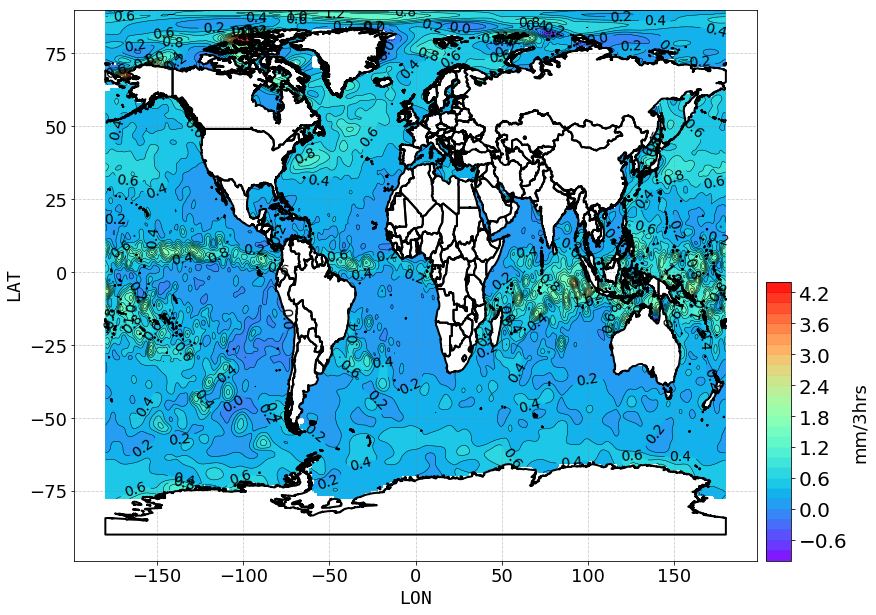

In [12]:
shp ='./data/shp/Countries_Shape/ne_10m_admin_0_countries.shp'
plot1p(data2[0,...], lat2, lon2, "mm/3hrs", "./graficos/prc_coads", putshp=shp)
plt.show()

Tienes suerte, los graficos se crearon sin problemas...


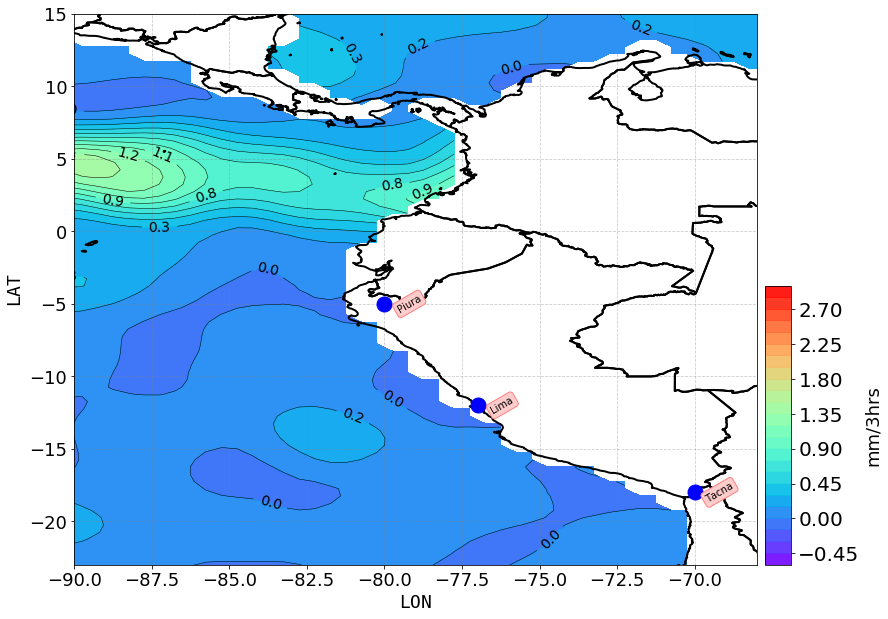

In [13]:
shp ='./data/shp/Countries_Shape/ne_10m_admin_0_countries.shp'
peru = [-23, 15, -90,-68]

clats = [-5, -12, -18]
clons = [-80, -77, -70]
cname = ["Piura", "Lima", "Tacna"]
ciudad = {"lats":clats, "lons":clons, "cname":cname}
import numpy.ma as ma
dataMask2 = ma.masked_outside(data2[0,...],-0.5,3)
from mypyplot import plot1p
plot1p(dataMask2, lat2, lon2, "mm/3hrs", "./graficos/prc_peru_coads", putshp=shp, subR=peru, city=ciudad)
plt.show()

Tienes suerte, los graficos se crearon sin problemas...


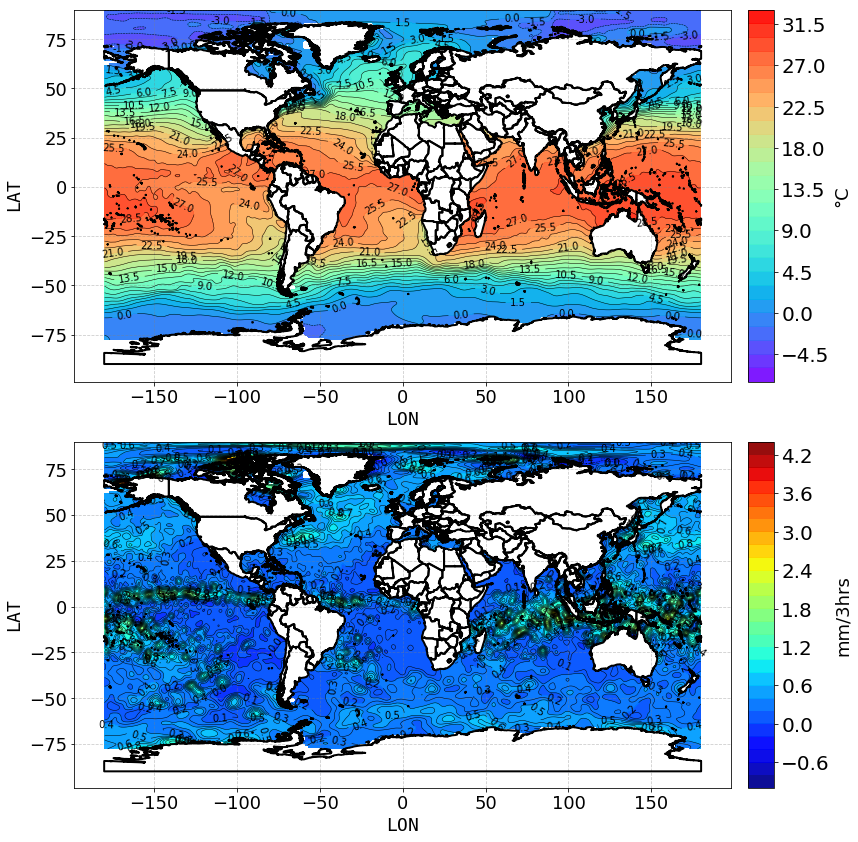

In [15]:
from mypyplot import plot2p
shp ='./data/shp/Countries_Shape/ne_10m_admin_0_countries.shp'
plot2p(data1[0,...], data2[0,...], lat1, lon1, ["°C", "mm/3hrs"], putshp=shp)
plt.show()
    

### Paquete basemap
El paquete basemap de Python cuenta con módulos para trabajar con archivos vectoriales y raster. Además cuenta métodos que permiten usar diferentes tipos de proyecciones cartográficas. En esta lección usaremos las proyecciones cilindrica **(cyl)** y ortográfica **(ortho)**.

In [28]:
# importar los paquetes numpy, matplotlib y netCDF4
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset as nc

# Leer archivo de datos en formato netCDF4
# Lectura de los datos de sst
ncfile    = nc("./data/sst.cdf")
data1 = ncfile.variables["sst"][:]
lon1  = ncfile.variables["X"][:]
lat1  = ncfile.variables["Y"][:]
print("dim(data1) = ", data1.shape)
print("dim(lon1) = ", lon1.shape)
print("dim(lat1) = ", lat1.shape)
print(lon1)

# Lectura de los datos de viento
u_ncfile    = nc("./data/u3.cdf")
v_ncfile    = nc("./data/v3.cdf")
print(u_ncfile)
print(v_ncfile)

udata = u_ncfile.variables["u3"][:]
ulon = u_ncfile.variables["X"][:]
ulat = u_ncfile.variables["Y"][:]
print("dim(udata) = ", udata.shape)
print("dim(ulon) = ", ulon.shape)
print("dim(ulat) = ", ulat.shape)

vdata = v_ncfile.variables["v3"]
print("dim(vdata) = ", vdata.shape)

dim(data1) =  (12, 360, 720)
dim(lon1) =  (720,)
dim(lat1) =  (360,)
[-179.75 -179.25 -178.75 -178.25 -177.75 -177.25 -176.75 -176.25 -175.75
 -175.25 -174.75 -174.25 -173.75 -173.25 -172.75 -172.25 -171.75 -171.25
 -170.75 -170.25 -169.75 -169.25 -168.75 -168.25 -167.75 -167.25 -166.75
 -166.25 -165.75 -165.25 -164.75 -164.25 -163.75 -163.25 -162.75 -162.25
 -161.75 -161.25 -160.75 -160.25 -159.75 -159.25 -158.75 -158.25 -157.75
 -157.25 -156.75 -156.25 -155.75 -155.25 -154.75 -154.25 -153.75 -153.25
 -152.75 -152.25 -151.75 -151.25 -150.75 -150.25 -149.75 -149.25 -148.75
 -148.25 -147.75 -147.25 -146.75 -146.25 -145.75 -145.25 -144.75 -144.25
 -143.75 -143.25 -142.75 -142.25 -141.75 -141.25 -140.75 -140.25 -139.75
 -139.25 -138.75 -138.25 -137.75 -137.25 -136.75 -136.25 -135.75 -135.25
 -134.75 -134.25 -133.75 -133.25 -132.75 -132.25 -131.75 -131.25 -130.75
 -130.25 -129.75 -129.25 -128.75 -128.25 -127.75 -127.25 -126.75 -126.25
 -125.75 -125.25 -124.75 -124.25 -123.75 -123.25 -122.7

### Proyección cilídrica (cyl)

(360,)
(720,)
(360, 720)


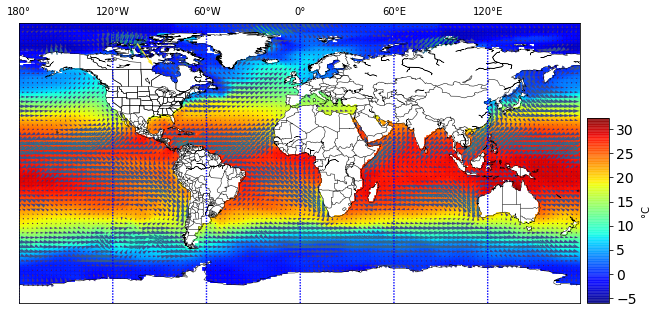

In [51]:
from mpl_toolkits.basemap import Basemap, shiftgrid, addcyclic
uudata,lon = shiftgrid(180.,udata,ulon,start=False)
vvdata,lon = shiftgrid(180.,vdata,ulon,start=False)

print(lats.shape)
print(lons.shape)
print(U.shape)

lats = ulat
lons = lon
m = Basemap(projection='cyl',
            llcrnrlat = lats.min(),
            urcrnrlat= lats.max(),
            llcrnrlon=lons.min(),
            urcrnrlon=lons.max(),
            resolution='c')
x, y = m(*np.meshgrid(lons, lats))

yy = np.arange(0, y.shape[0], 6)
xx = np.arange(0, x.shape[1], 6)
points = np.meshgrid(yy, xx)

U = uudata[0,...]; V = vvdata[0,...]; DATA = data1[0,...]
xp = x[points]
yp = y[points]
up = U[points]
vp = V[points]

fig = plt.figure(figsize=(10,6))
ax =fig.add_axes([0.08,0.08,0.78,0.95])

pcm = m.pcolormesh(x,y, DATA, alpha=0.6, shading='flat',cmap=plt.cm.jet)

q = m.quiver(x[points], y[points], U[points], V[points],speed[points], angles='xy', scale=500,  pivot='mid', color="k")

labelColor = "b"
m.drawcountries(linewidth=0.5, linestyle='solid',color="k")
m.drawstates()
m.drawcoastlines(linewidth=0.5, linestyle='solid',color="k")
m.drawmeridians(np.arange(int(lons.min()),int(lons.max()),60), labels=[0,1,1,0],linewidth=1.4, color=labelColor,fontsize=10)
#m.drawparallels(np.arange(int(lats.min()),int(lats.max()),30), labels=[1,0,0,0],linewidth=1.4, color=labelColor,fontsize=10)

ax_cbar = fig.add_axes([0.87, 0.23, 0.03, 0.43])
cbar = plt.colorbar(pcm,cax=ax_cbar, orientation='vertical')
cbar.set_label("°C")
cbar.ax.tick_params(labelsize=14)
plt.savefig("./graficos/sst_wind.pdf")
plt.show()

### Proyección ortográfica (ortho)

/home/usuario/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


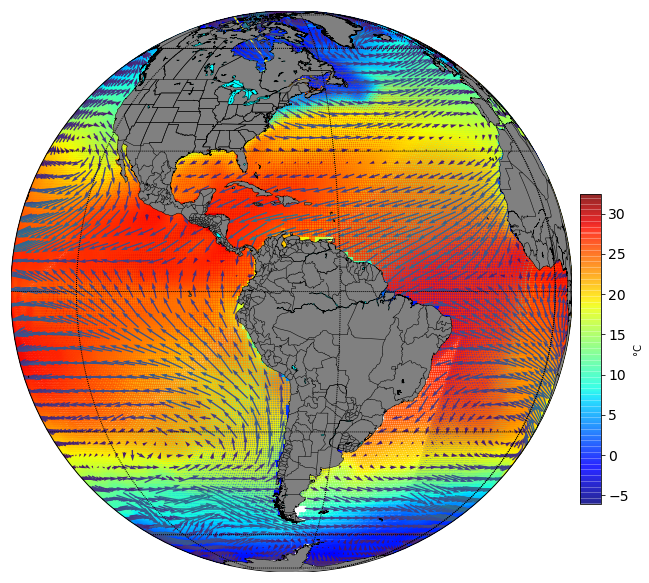

In [57]:
m1 = Basemap(projection='ortho',lon_0= -70,lat_0=0,resolution='l')

fig1 = plt.figure(figsize=(10,10))
ax =fig1.add_axes([0.08,0.05,0.78,0.95])

pcm1 = m1.pcolormesh(x,y, DATA, alpha=0.6, shading='flat',cmap=plt.cm.jet, latlon=True)
q1 = m1.quiver(x[points], y[points], U[points], V[points],speed[points], angles='xy', scale=150,  pivot='mid', color="k", latlon=True)

labelColor = "b"
m1.fillcontinents(color='grey',lake_color='aqua')
m1.drawcountries(linewidth=0.5, linestyle='solid',color="k")
m1.drawstates()
m1.drawcoastlines(linewidth=0.5, linestyle='solid',color="k")
m1.drawparallels(np.arange(-90.,120.,30.))
m1.drawmeridians(np.arange(0.,420.,60.))

ax_cbar = fig1.add_axes([0.87, 0.23, 0.03, 0.43])
cbar = plt.colorbar(pcm1,cax=ax_cbar, orientation='vertical')
cbar.set_label("°C")
cbar.ax.tick_params(labelsize=14)

plt.savefig("./graficos/sst_wind_prjOrtho.png")
plt.show()